In [3]:
ls

DL1.ipynb           diabetes.txt        diabetes_scale.txt


In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [4]:
def deal(path):
    f=open(path, encoding='gbk')
    txt=[]
    for line in f:
        txt.append(line.strip())
    
    ans  = []
    for i in range(len(txt)):
        temp = []
        key = txt[i]
        key = key.split(" ")

        if key[0] == '+1':
            temp.append(1)
        else:
            temp.append(-1)

        for w in range(2,len(key)):
            land = key[w].split(":")
            temp.append(float(land[1]))

        ans.append(temp)

    any = pd.DataFrame(ans)
    return any

In [6]:
any = deal('diabetes.txt')[:700]
any 


,0,1,2,3,4,5,6,7,8
0,-1,6.0,148.0,72.0,35.0,0.0,33.599998,0.627,50.0
1,1,1.0,85.0,66.0,29.0,0.0,26.600000,0.351,31.0
2,-1,8.0,183.0,64.0,0.0,0.0,23.299999,0.672,32.0
3,1,1.0,89.0,66.0,23.0,94.0,28.100000,0.167,21.0
4,-1,0.0,137.0,40.0,35.0,168.0,43.099998,2.288,33.0
...,...,...,...,...,...,...,...,...,...
695,-1,7.0,142.0,90.0,24.0,480.0,30.400000,0.128,43.0
696,-1,3.0,169.0,74.0,19.0,125.0,29.900000,0.268,31.0
697,1,0.0,99.0,0.0,0.0,0.0,25.000000,0.253,22.0
698,1,4.0,127.0,88.0,11.0,155.0,34.500000,0.598,28.0


Text(0.5, 1.0, 'feature = label')

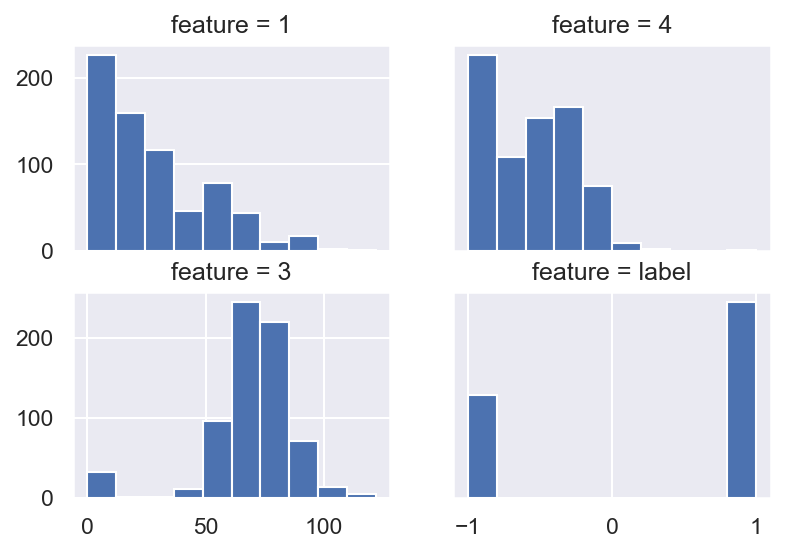

In [7]:
plt.figure(dpi=150)
plt.subplot(2, 2, 1)
plt.hist(any[1])
plt.xticks([]) 
# plt.yticks([]) 
plt.title("feature = 1")

plt.subplot(2, 2, 2)
plt.hist(any[4])
plt.yticks([]) 
plt.xticks([]) 
plt.title("feature = 4")

plt.subplot(2, 2, 3)
plt.hist(any[3])
plt.title("feature = 3")


plt.subplot(2, 2, 4)
plt.hist(any[0])
plt.yticks([]) 
plt.title("feature = label")

(array([241.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 459.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

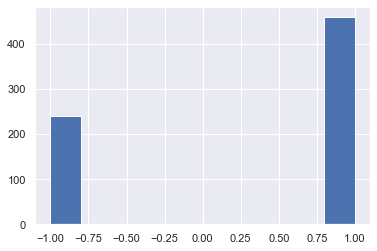

In [8]:
plt.hist(any[0])

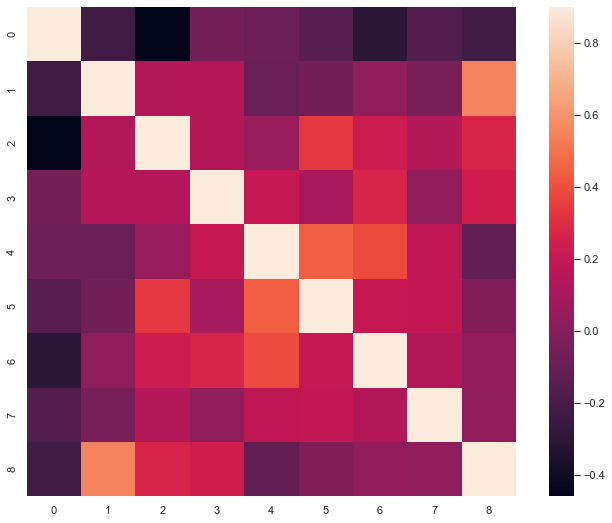

In [9]:
corr = any.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corr,vmax=0.9,square=True,linecolor='white')
plt.show()

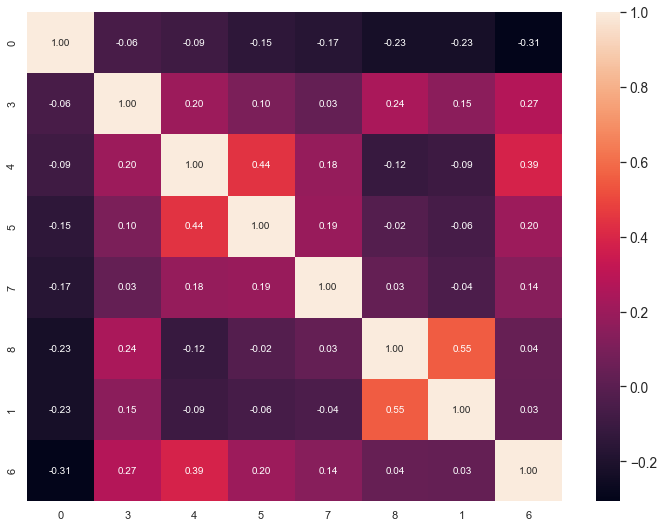

In [10]:
k=8
f,ax=plt.subplots(figsize=(12,9))
c = corr.nlargest(k,0)[0].index
cm=np.corrcoef(any[c].values.T)
sns.set(font_scale=1.25)
hm=sns.heatmap(cm,cbar=True,annot=True,fmt='.2f',annot_kws={'size':10}, yticklabels=c.values, xticklabels=c.values)
plt.show()

/usr/local/lib/python3.9/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


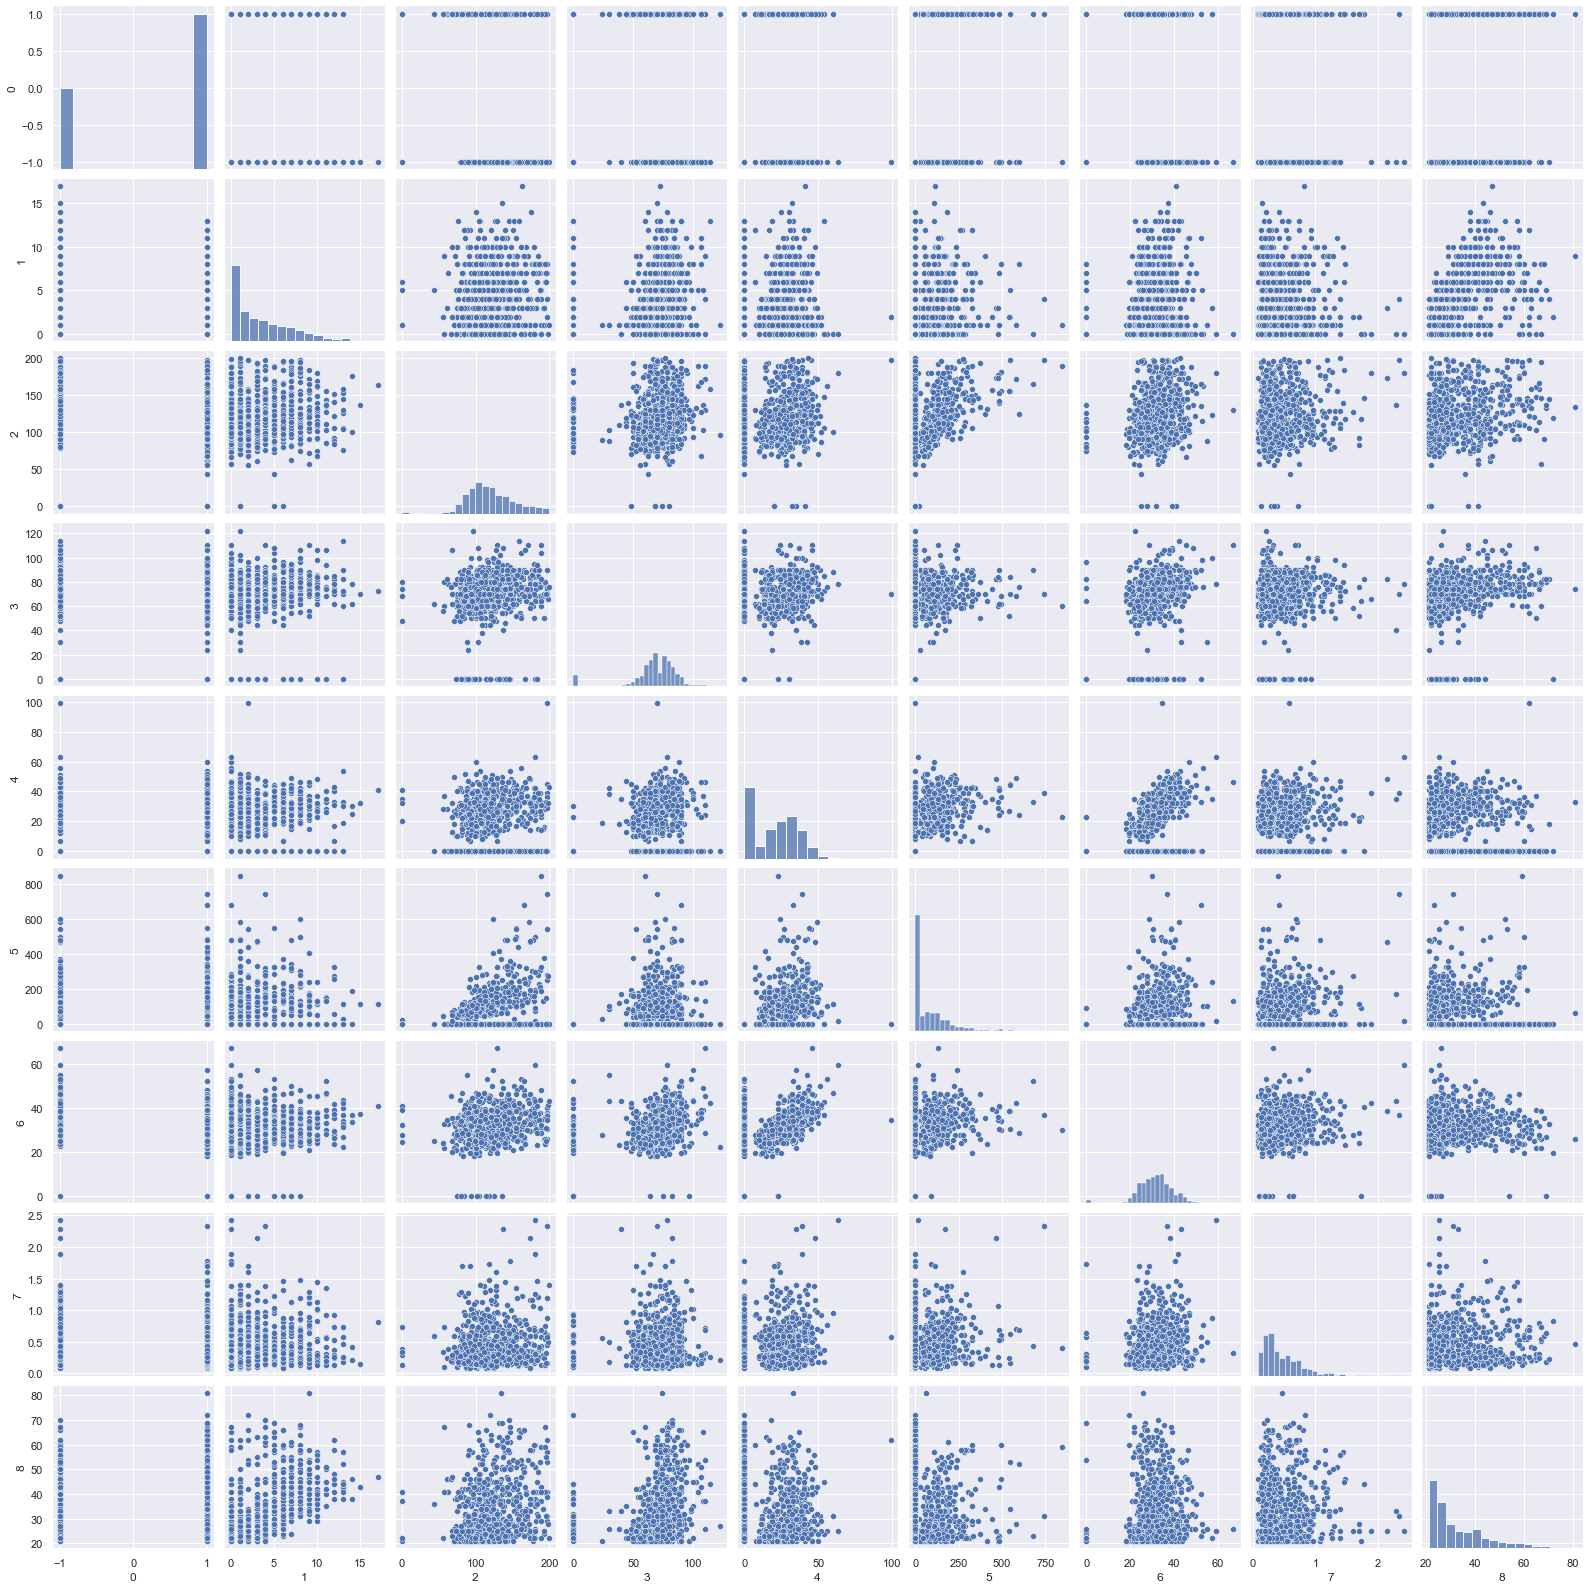

In [11]:
sns.set()
c_scatter=[0,1,2,3,4,5,6,7,8]
pair_scatter=sns.pairplot(any[c_scatter],size=2.5)
plt.show()

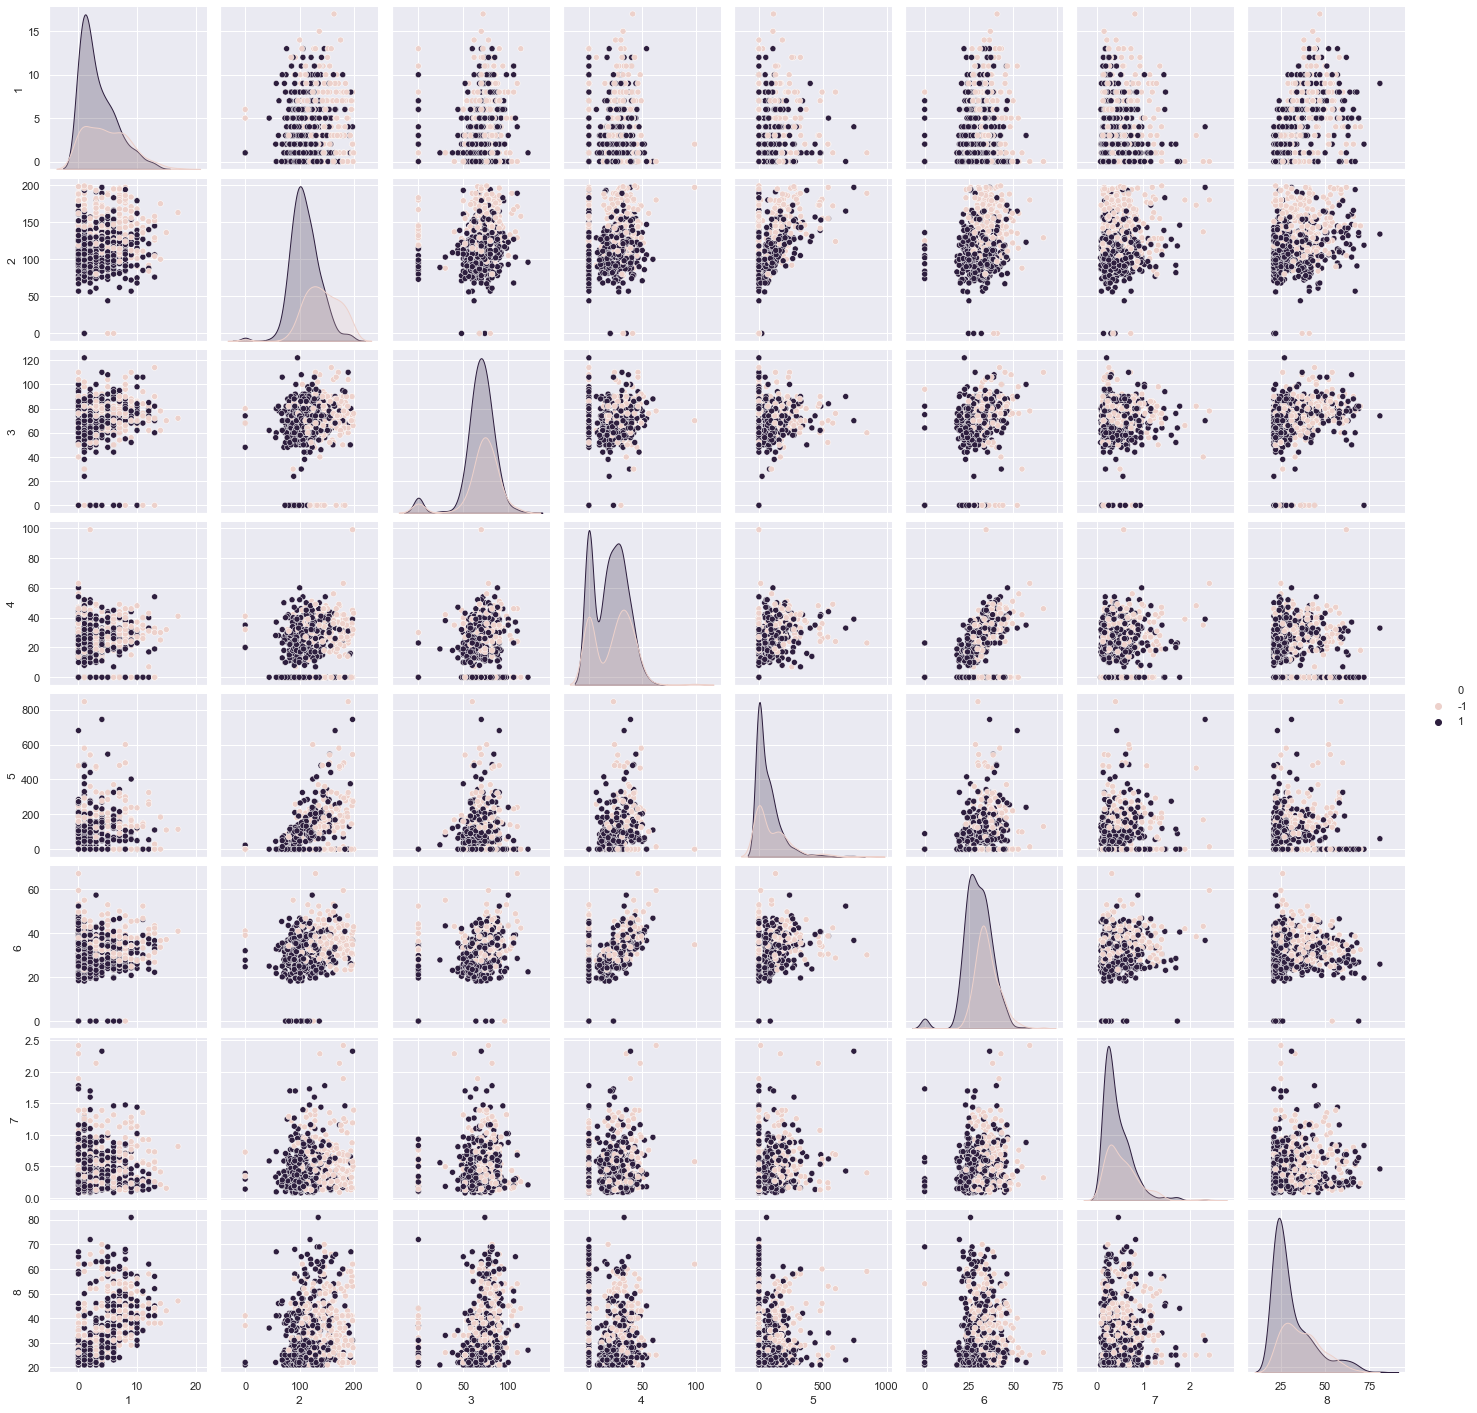

In [12]:
p=sns.pairplot(any[c_scatter], hue = 0)
plt.show()

In [18]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
import torch

In [19]:
features = []
labels = []

for i in range(len(any)):
    demo = any.loc[i][:]
    demo = list(demo)
    features.append(demo[1:])
    labels.append(demo[0])

train = torch.tensor(features)
label = torch.tensor(labels)

In [20]:
train.shape

torch.Size([700, 8])

In [21]:
from sklearn.decomposition import PCA
pca =  PCA(n_components=5)
pca.fit(train)
projected = pca.transform(train)

print(train.shape)
print(projected.shape)

torch.Size([700, 8])
(700, 5)


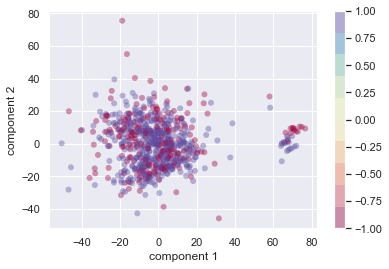

In [22]:
import matplotlib.cm

plt.scatter(projected[:, 2], projected[:, 3],
            c=label, edgecolor='none', alpha=0.4,
            cmap=plt.cm.get_cmap('Spectral', 10))
            
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [23]:
def sign_hard(v):
    if v>0:
        return 1
    else:
        return -1


def sigmoid(x):
    return 1.0/(1+np.exp(-x/3000))

def sign_soft(v):
   return sigmoid(v)*2-1


In [24]:

def training(lr,epochs, batch_size):
    
    train_dataset = []
    for i in range(len(any)):
        demo = any.loc[i][:]
        demo = list(demo)
        train_dataset.append(demo)
        
    train_data = train_dataset 
    weight = list(np.random.randn(8))
    bias = 0
    learning_rate = lr
    train_num = epochs
    loss = []
    
    
    for j in range(train_num // batch_size):

        temp1 = []
        temp2 = []
        for i in range(batch_size):
          train = random.choice(train_data)
          data = train[1:] 
          label = train[0]
          y_predict = sign_hard(np.dot(data, weight)+ bias)
          # temp.append(abs(label - y_predict))
          temp1.append(label)
          temp2.append(y_predict)
   
          if label*y_predict<=0:
              weight[0] = weight[0] + learning_rate*label*data[0]
              weight[1] = weight[1] + learning_rate*label*data[1]
              weight[2] = weight[2] + learning_rate*label*data[2]
              weight[3] = weight[3] + learning_rate*label*data[3]
              weight[4] = weight[4] + learning_rate*label*data[4]
              weight[5] = weight[5] + learning_rate*label*data[5]
              weight[6] = weight[6] + learning_rate*label*data[6]
              weight[7] = weight[7] + learning_rate*label*data[7]
              bias = bias + learning_rate*label

        loss.append(sum(temp2) - sum(temp1))
        # print(sum(temp2) - sum(temp1),label*y_predict)

    plt.plot(loss)
    return weight, bias


In [25]:
val = deal('diabetes.txt')[700:]
k = [ i for i in range(68)]
val.index = k

0.6617647058823529

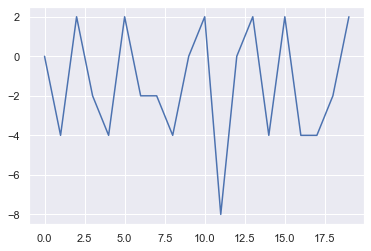

In [31]:
weight, bias = training(0.1,400,20)
accaurcy = 0
for i in range(len(val)):
    pred = sign_hard(np.dot(weight, val.iloc[i][1:]) + bias)

    if pred == val[0][i]:
      accaurcy += 1

accaurcy / 68

0.6029411764705882

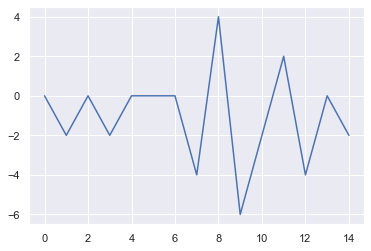

In [33]:
weight, bias = training(0.01,300,20)
accaurcy = 0
for i in range(len(val)):
    pred = sign_hard(np.dot(weight, val.iloc[i][1:]) + bias)

    if pred == val[0][i]:
        accaurcy += 1

accaurcy / 68

0.6029411764705882

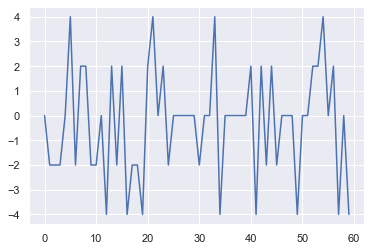

In [34]:
weight, bias = training(0.001,300,5)
accaurcy = 0
for i in range(len(val)):
    pred = sign_hard(np.dot(weight, val.iloc[i][1:]) + bias)
    if pred == val[0][i]:
          accaurcy += 1

accaurcy / 68

In [35]:
import pandas as pd 

list_lr = [0.1,0.01,0.001,0.0001]
list_epoch = [100,200,300,400]

data = pd.DataFrame(
  columns = list_epoch, 
  index = list_lr 
) 

data

,100,200,300,400
0.1000,NaN,NaN,NaN,NaN
0.0100,NaN,NaN,NaN,NaN
0.0010,NaN,NaN,NaN,NaN
0.0001,NaN,NaN,NaN,NaN


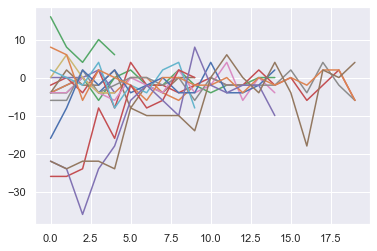

In [39]:
for lr in list_lr :
  for j in list_epoch:
    weight, bias = training(lr,j,20)
    accaurcy = 0
    for i in range(len(val)):
        pred = sign_hard(np.dot(weight, val.iloc[i][1:]) + bias)
        if pred == val[0][i]:
            accaurcy += 1
    data.loc[lr][j] =  accaurcy / 68

In [333]:
data

,100,200,300,400
0.1000,0.705882,0.529412,0.588235,0.588235
0.0100,0.411765,0.602941,0.617647,0.602941
0.0010,0.558824,0.573529,0.676471,0.588235
0.0001,0.529412,0.5,0.602941,0.720588


In [40]:
%pip install matplotlib_inline
%pip install d2l

You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [41]:
import random
import torch
from d2l import torch as d2l

In [42]:
features = []
labels = []

for i in range(len(any)):
    demo = any.loc[i][:]
    demo = list(demo)
    features.append(demo[1:])
    labels.append(demo[0])

features = torch.tensor(features)
labels = torch.tensor(labels).reshape((700,1))
features.shape, labels.shape

(torch.Size([700, 8]), torch.Size([700, 1]))

In [50]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]


w = torch.normal(0, 0.01, size=(8,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

def linreg(X, w, b):  
    return torch.matmul(X, w) + b


def squared_loss(y_hat, y):  
    return (y_hat/1000 - y.reshape(y_hat.shape)) ** 2 / 2

def sgd(params, lr, batch_size): 
    with torch.no_grad():
        for param in params:
            if param.grad == None:
              param.grad = torch.tensor(0.0)
            param -= lr * param.grad / batch_size
            param.grad.zero_()



lr = 0.0003
num_epochs = 500
net = linreg
loss = squared_loss
tuplot = []
batch_size = 1

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  
        l.requires_grad_(True)
        l.sum().backward()
        sgd([w, b], lr, batch_size) 
        tuplot.append(float(l))

    if epoch % 50 ==0:
      with torch.no_grad():
          train_l = loss(net(features, w, b), labels)
          print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.500146
epoch 51, loss 0.490567
epoch 101, loss 0.484908
epoch 151, loss 0.481282
epoch 201, loss 0.478749
epoch 251, loss 0.476839
epoch 301, loss 0.475309
epoch 351, loss 0.474030
epoch 401, loss 0.472927
epoch 451, loss 0.471957


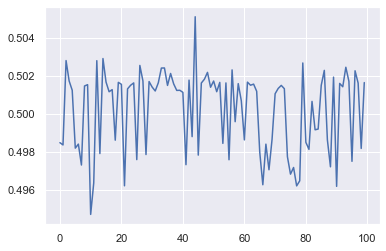

In [52]:

plt.plot(tuplot[:100])


In [54]:
val = deal('diabetes.txt')[700:]

features = []
labels = []

for i in range(700,700+len(val)):
    demo = val.loc[i][:]
    demo = list(demo)
    features.append(demo[1:])
    labels.append(demo[0])

features = torch.tensor(features)
labels = torch.tensor(labels).reshape((68,1))
features.shape, labels.shape

(torch.Size([68, 8]), torch.Size([68, 1]))

In [55]:
for i in range(len(val)):
    pred = net(features[i], w, b)
    if pred == labels[i]:
        accaurcy += 1

accaurcy / 68     

0.6029411764705882